In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps

from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

stock_data = pd.concat(company_list, axis=0)
stock_data.tail(10)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-22,125.309998,130.330002,125.139999,130.149994,130.149994,90354600,AMAZON
2023-06-23,129.110001,130.839996,128.279999,129.330002,129.330002,71855200,AMAZON
2023-06-26,129.330002,131.490005,127.099998,127.330002,127.330002,59989300,AMAZON
2023-06-27,128.630005,130.089996,127.550003,129.179993,129.179993,46801000,AMAZON
2023-06-28,128.940002,131.479996,128.440002,129.039993,129.039993,52149500,AMAZON
2023-06-29,128.770004,129.259995,127.260002,127.900002,127.900002,40761000,AMAZON
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMAZON
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800,AMAZON
2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400,AMAZON


Some Infos and Descriptive Statistics of the data

In [2]:
stock_data['company_name'].value_counts()

APPLE        1007
GOOGLE       1007
MICROSOFT    1007
AMAZON       1007
Name: company_name, dtype: int64

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4028 entries, 2019-07-08 to 2023-07-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4028 non-null   float64
 1   High          4028 non-null   float64
 2   Low           4028 non-null   float64
 3   Close         4028 non-null   float64
 4   Adj Close     4028 non-null   float64
 5   Volume        4028 non-null   int64  
 6   company_name  4028 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 251.8+ KB


In [4]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4028.000000,4028.000000,4028.000000,4028.000000,4028.000000,4.028000e+03
mean,148.631009,150.375463,146.911508,148.701449,147.420966,6.050438e+07
std,66.627699,67.242215,65.955987,66.636966,65.673650,4.582421e+07
min,48.852501,49.517502,48.145000,48.334999,46.895710,6.936000e+06
25%,99.007627,100.525000,97.650003,99.199999,99.199999,2.681762e+07
50%,138.266502,139.704002,136.585007,138.183502,136.463745,4.850195e+07
75%,170.992496,172.944744,169.151623,171.070999,170.077248,7.955210e+07
max,351.320007,351.470001,342.200012,348.100006,348.100006,4.265100e+08


Import few important libraries for further processing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

Closing price graph

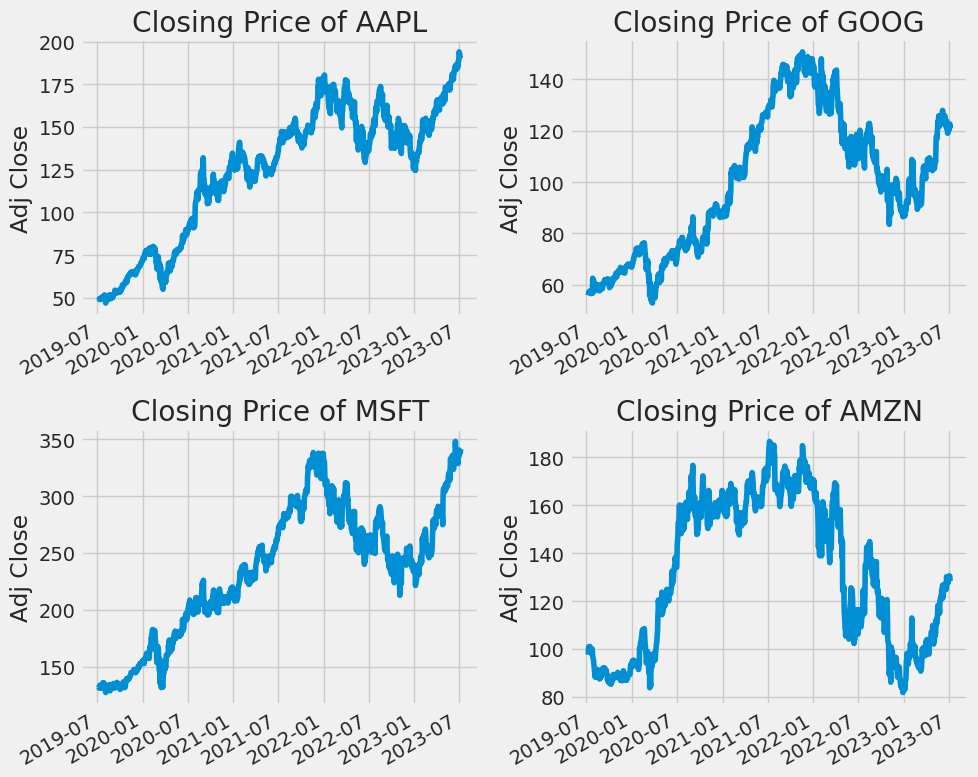

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

Volume of Sales

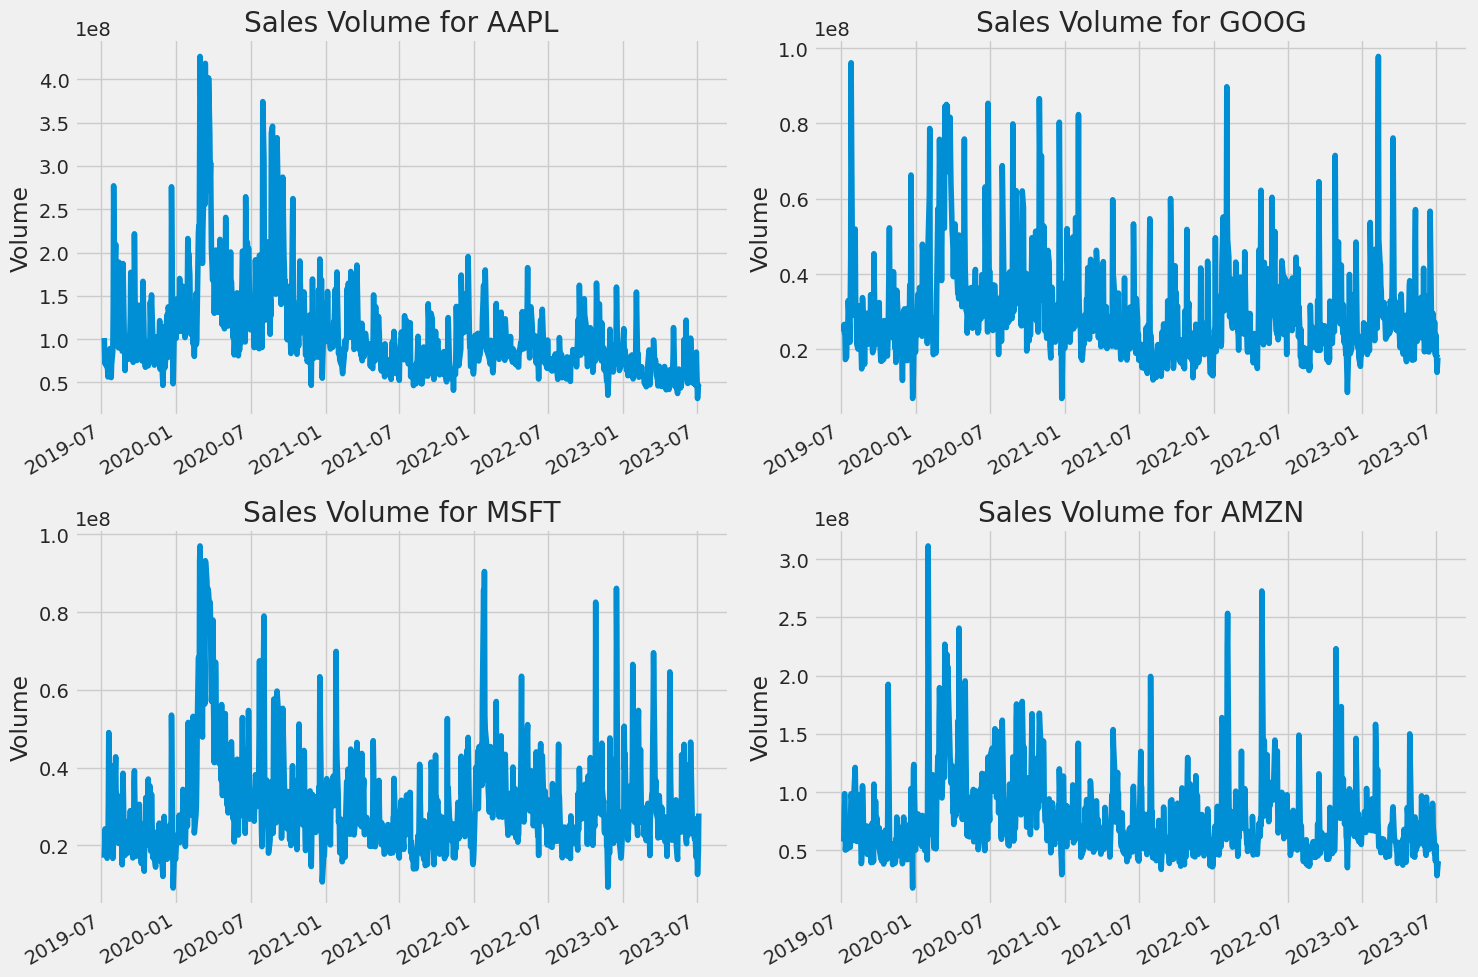

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=( 15,10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

What was the moving average of the various stocks?

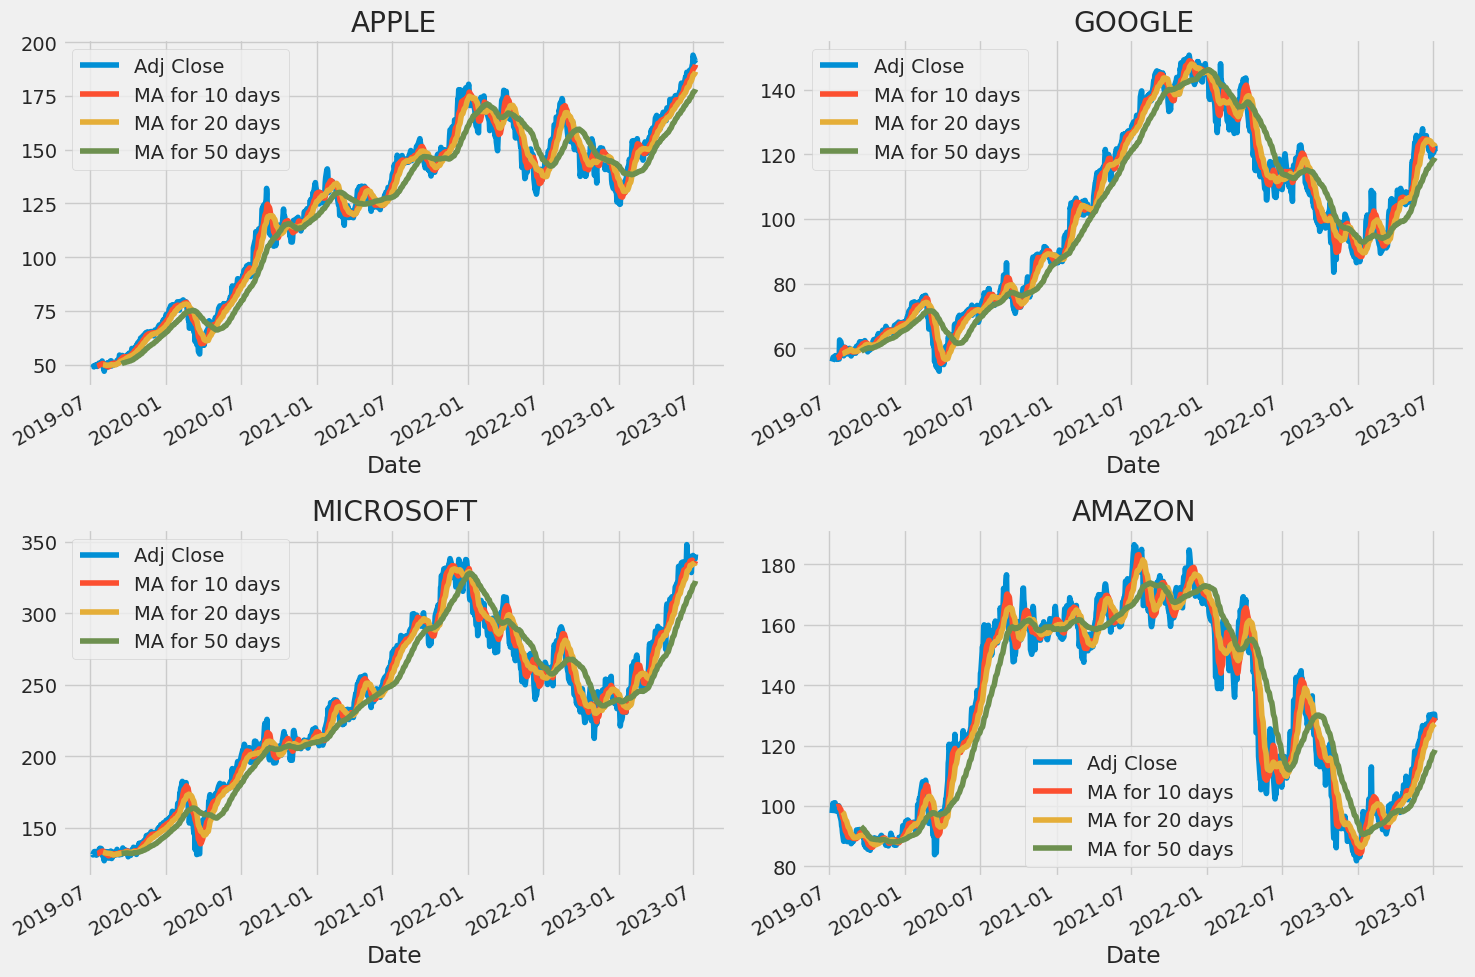

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')


GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

What was the daily return of the stock on average?

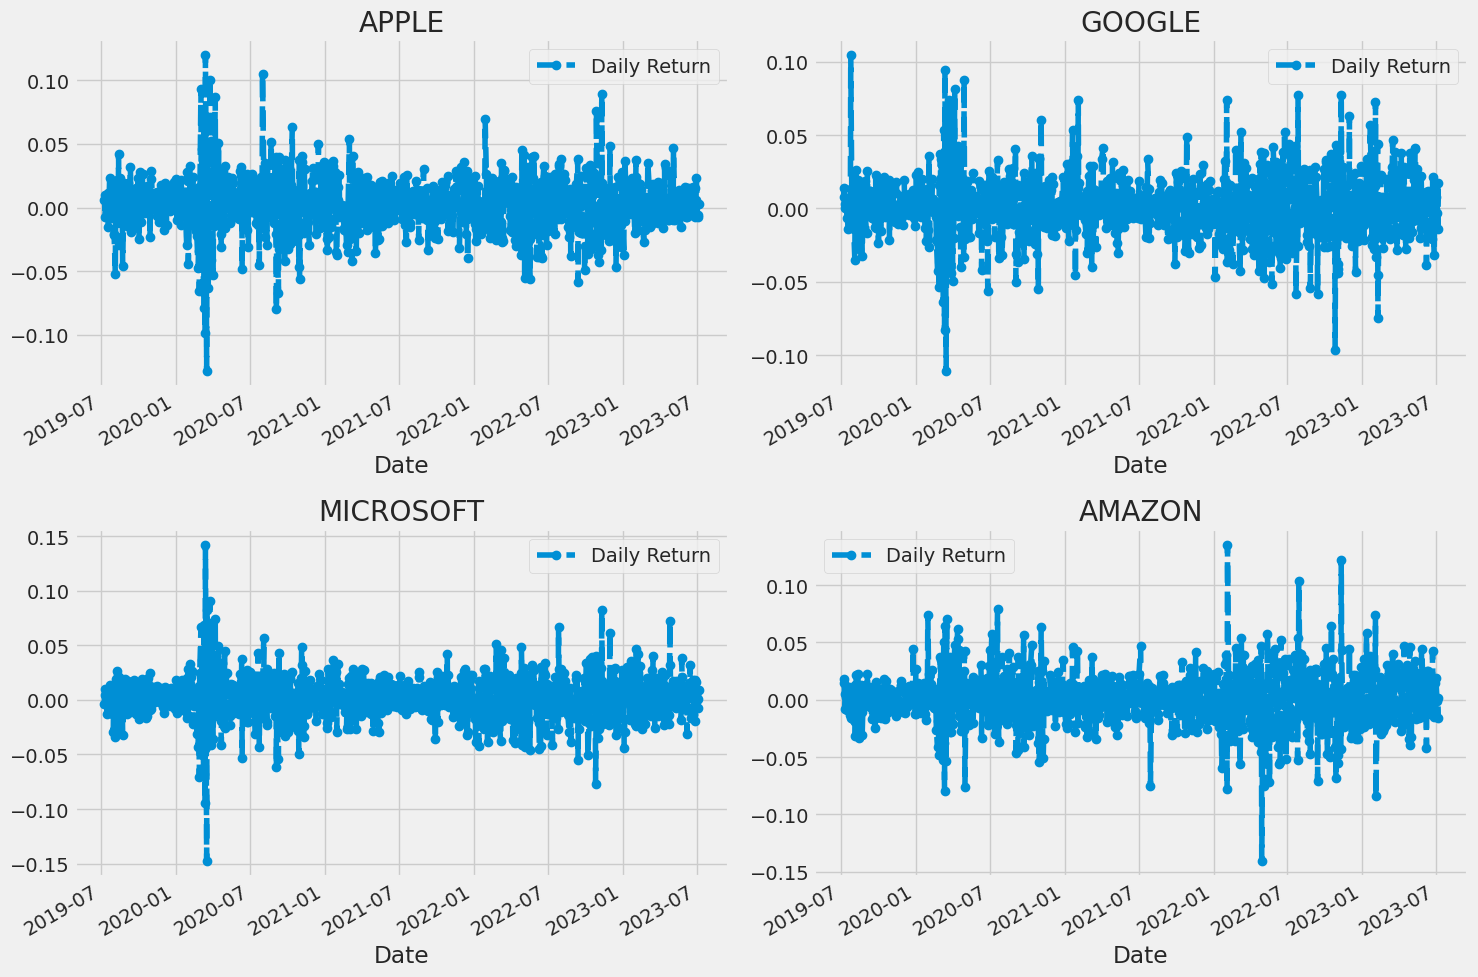

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Average Daily return

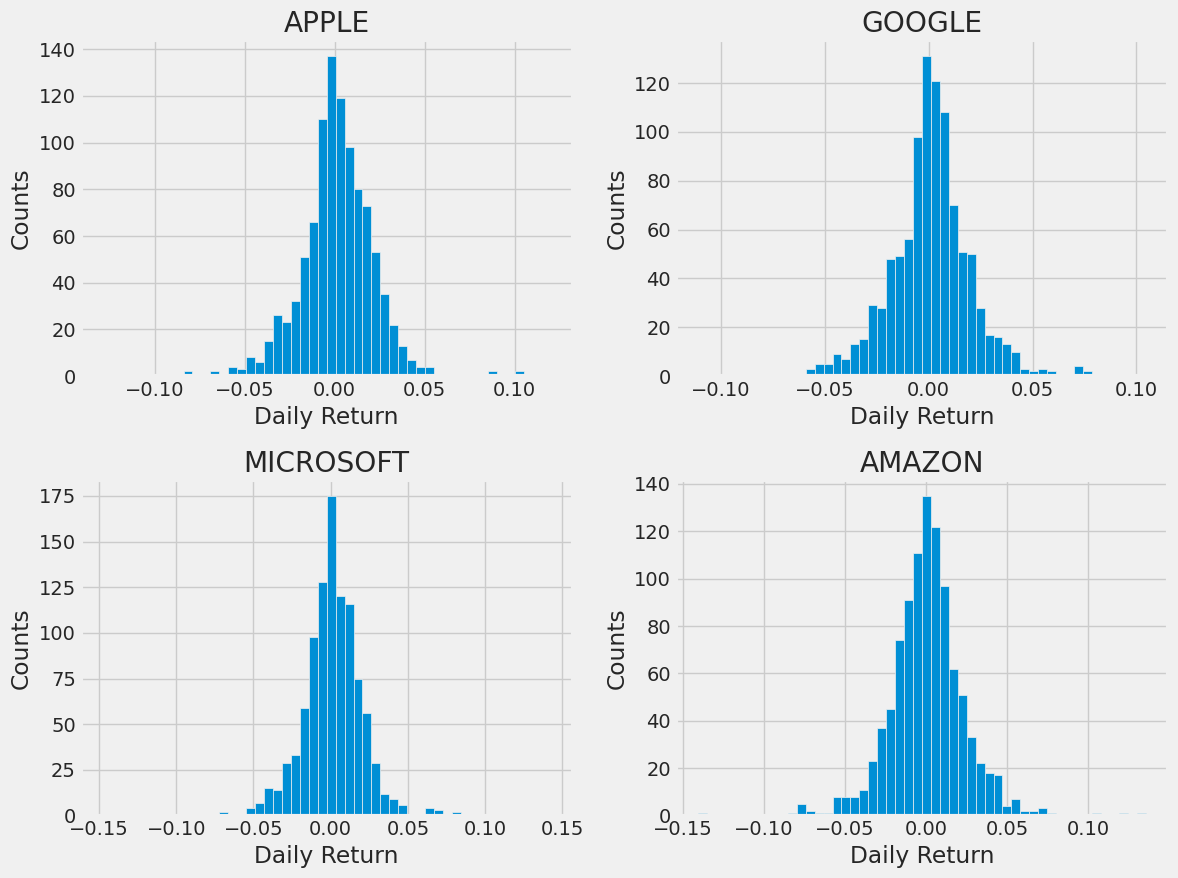

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

### **Exploratory Data Analysis**

What was the correlation between different stocks closing prices?

In [11]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-07-08,NaN,NaN,NaN,NaN
2019-07-09,0.006100,0.018429,0.007596,-0.003651
2019-07-10,0.009889,0.014641,0.013913,0.010186
2019-07-11,-0.007282,-0.008100,0.003271,0.003990
2019-07-12,0.007683,0.004962,0.000603,0.003613


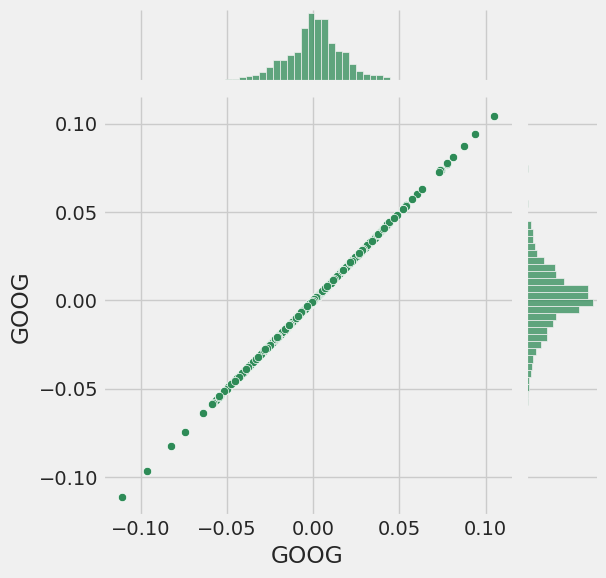

In [12]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

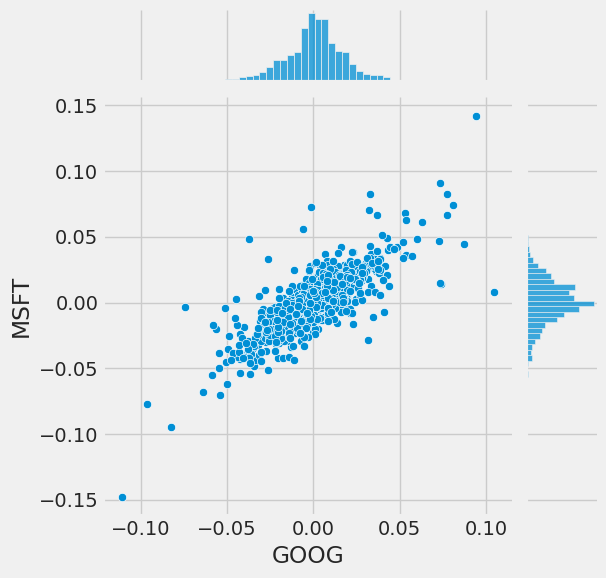

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

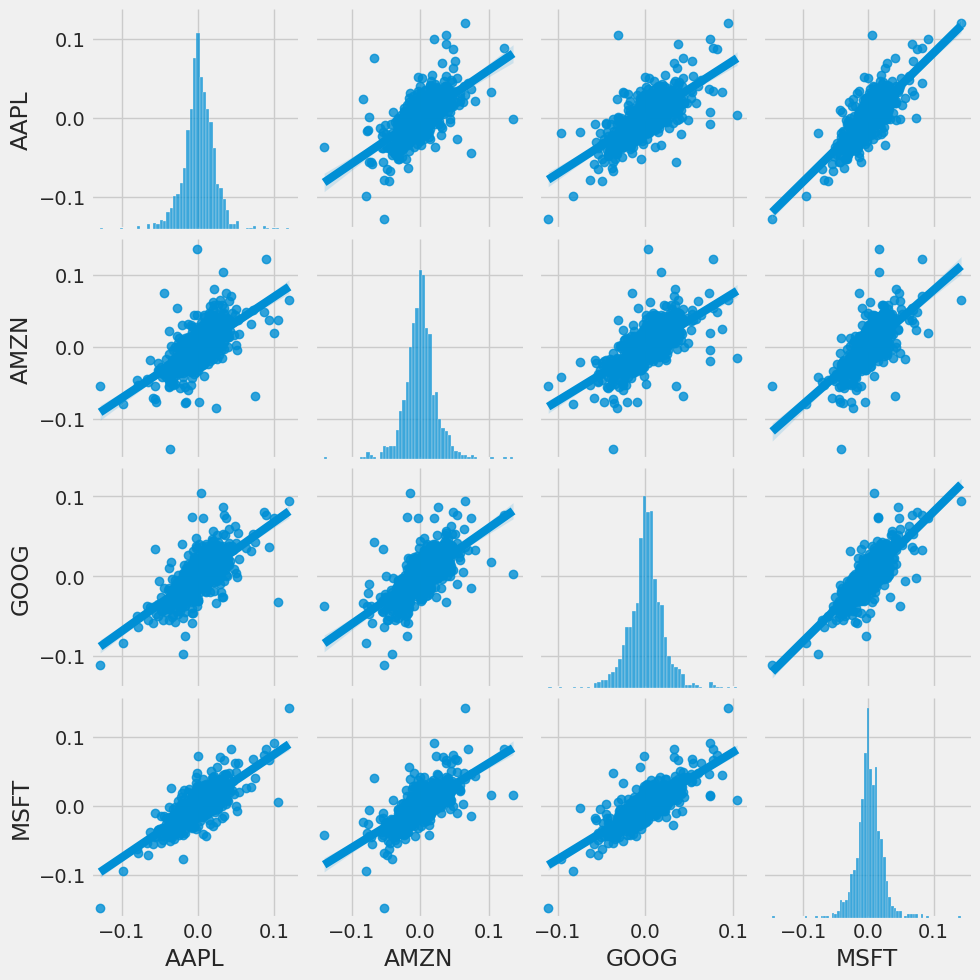

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

sns.pairplot(tech_rets, kind='reg')

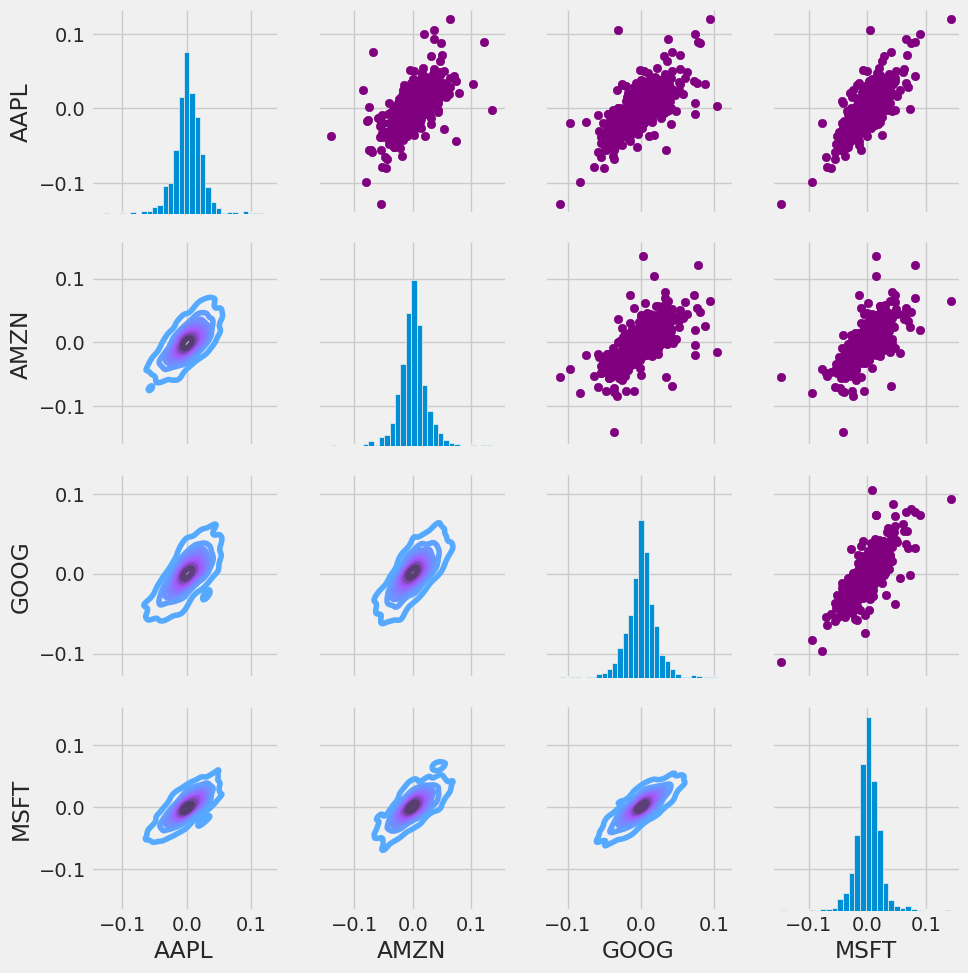

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

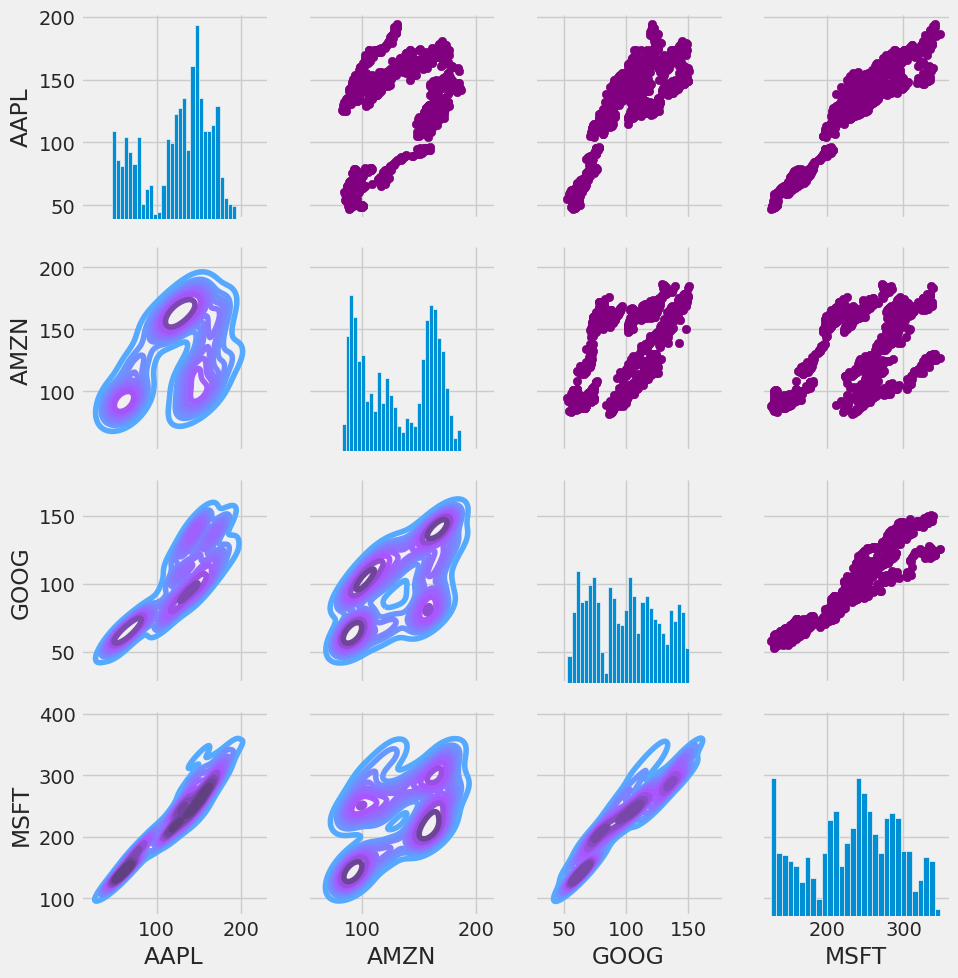

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

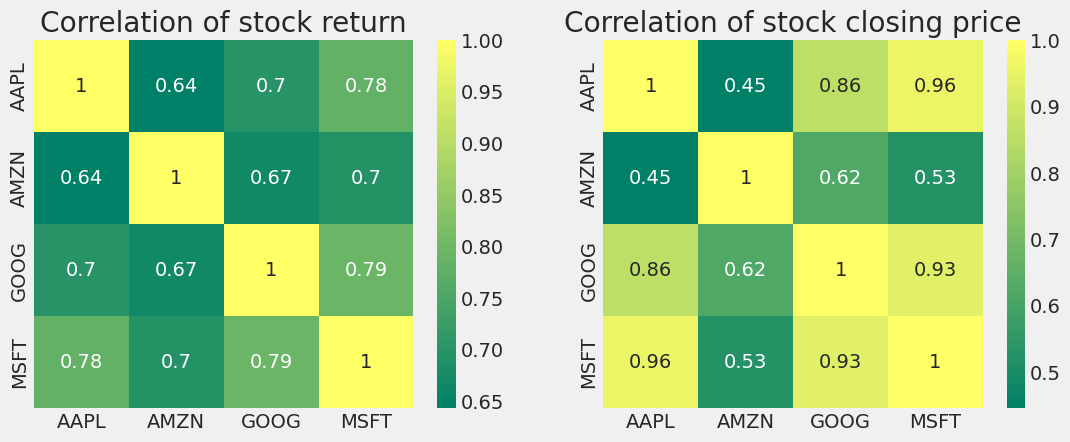

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

How much value do we put at risk by investing in a particular stock

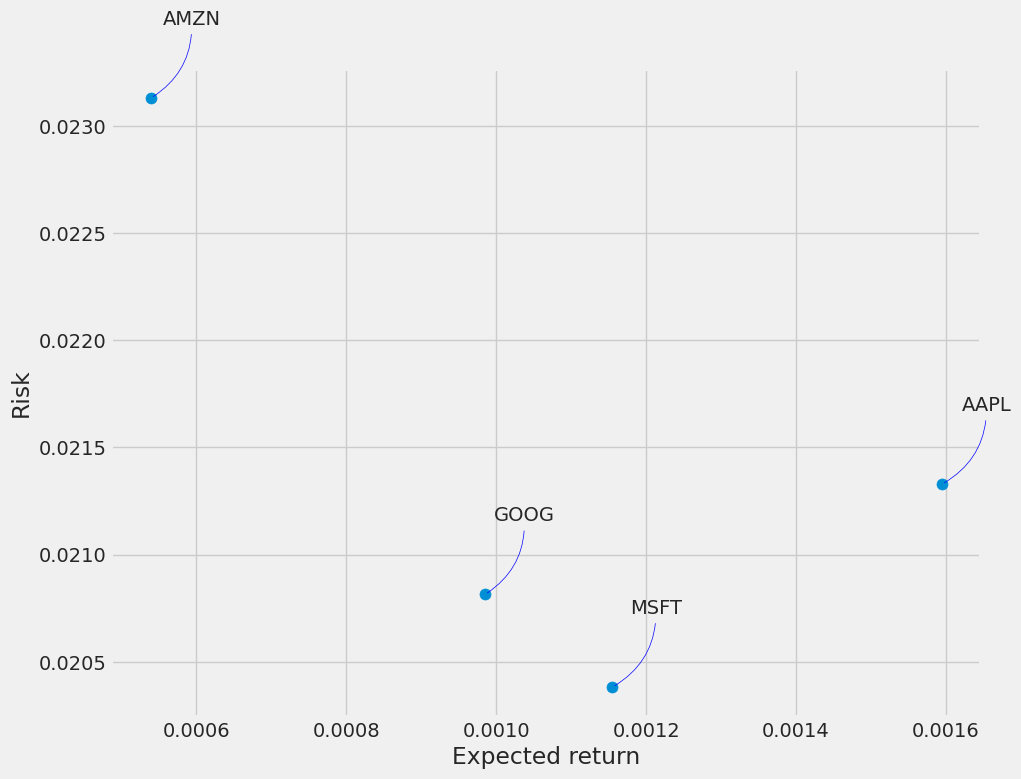

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting the closing price stock price:

In [19]:
import yfinance as yf

# Define the list of company tickers
tickers = ['GOOGL', 'AMZN', 'MSFT', 'AAPL']

# Set the start and end dates for the data
start_date = '2012-01-01'
end_date = '2023-07-06'

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Fetch the stock data for each ticker
for ticker in tickers:
    # Fetch the data from Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Add a new column to indicate the company name
    data['company_name'] = ticker

    # Concatenate the data to the main stock_data DataFrame
    stock_data = pd.concat([stock_data, data])

# Print the loaded dataset
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-01-03  16.339840  16.720470  16.325577  16.651901  16.651901  146912940   
2012-01-04  16.642391  16.773024  16.532032  16.723724  16.723724  114445440   
2012-01-05  16.569820  16.615866  16.422173  16.491741  16.491741  131184684   
2012-01-06  16.495245  16.516518  16.261011  16.266768  16.266768  107608284   
2012-01-09  16.178679  16.191191  15.546296  15.577077  15.577077  232671096   

           company_name  
Date                     
2012-01-03        GOOGL  
2012-01-04        GOOGL  
2012-01-05        GOOGL  
2012-01-06        GOOGL  
2012-01

In [20]:
# Preprocess the dataset
dataset = stock_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [21]:
# Split the dataset into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [22]:
# Function to create input features and target variable
def create_dataset(data, time_steps):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        Y.append(data[i + time_steps])
    return np.array(X), np.array(Y)


In [23]:
# Define the number of previous days used to predict the next day
time_steps = 60


In [24]:
# Create the training and testing datasets
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)


In [25]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [26]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
288/288 [==============================] - 14s 39ms/step - loss: 0.0027
Epoch 2/10
288/288 [==============================] - 11s 39ms/step - loss: 6.2848e-04
Epoch 3/10
288/288 [==============================] - 11s 38ms/step - loss: 5.1650e-04
Epoch 4/10
288/288 [==============================] - 11s 38ms/step - loss: 4.4693e-04
Epoch 5/10
288/288 [==============================] - 11s 39ms/step - loss: 3.5840e-04
Epoch 6/10
288/288 [==============================] - 11s 39ms/step - loss: 3.5420e-04
Epoch 7/10
288/288 [==============================] - 11s 39ms/step - loss: 2.8780e-04
Epoch 8/10
288/288 [==============================] - 11s 39ms/step - loss: 2.6304e-04
Epoch 9/10
288/288 [==============================] - 11s 39ms/step - loss: 2.4696e-04
Epoch 10/10
288/288 [==============================] - 11s 39ms/step - loss: 2.4092e-04


In [27]:
# Evaluate the model
train_loss = model.evaluate(X_train, Y_train)
test_loss = model.evaluate(X_test, Y_test)


71/71 [==============================] - 1s 12ms/step - loss: 8.2428e-05


In [28]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


71/71 [==============================] - 1s 11ms/step


In [29]:
# Inverse transform the predictions to get actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


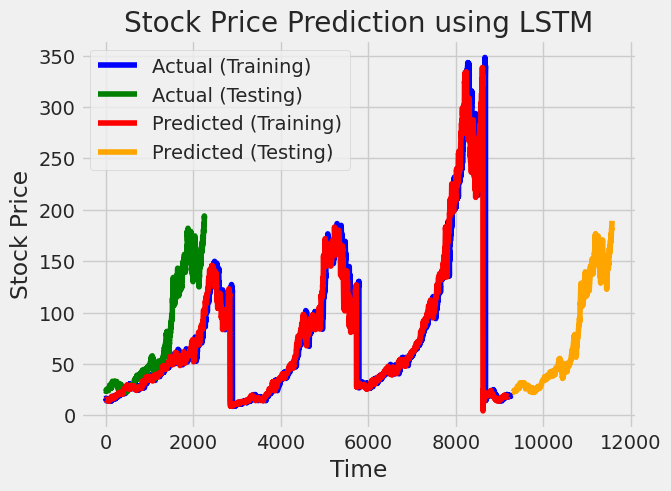

In [30]:
# Plot the actual stock prices and predicted prices
plt.plot(stock_data['Close'].values[:train_size], color='blue', label='Actual (Training)')
plt.plot(stock_data['Close'].values[train_size + time_steps:], color='green', label='Actual (Testing)')
plt.plot(train_predictions, color='red', label='Predicted (Training)')
plt.plot(range(train_size + time_steps, len(stock_data)), test_predictions, color='orange', label='Predicted (Testing)')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [31]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - Y_test) ** 2)))
rmse

71/71 [==============================] - 1s 12ms/step


89.10938029399006

In [32]:
print("Actual (Training):")
print(stock_data['Close'].values[:train_size])

print("\nPredicted (Training):")
print(train_predictions.flatten())

print("\nActual (Testing):")
print(stock_data['Close'].values[train_size + time_steps:])

print("\nPredicted (Testing):")
test_predictions.flatten()


Actual (Training):
[16.65190125 16.72372437 16.49174118 ... 18.74785614 18.97035789
 18.98928642]

Predicted (Training):
[15.903088  15.9254465 15.878759  ... 18.132196  18.165466  18.269653 ]

Actual (Testing):
[ 23.60750008  23.48500061  23.68000031 ... 193.97000122 192.46000671
 191.33000183]

Predicted (Testing):


array([ 22.987984,  22.918007,  22.868217, ..., 185.73251 , 188.45815 ,
       189.25023 ], dtype=float32)

In [33]:
df_actual_predicted = pd.DataFrame({
                                    'Actual (Testing)': stock_data['Close'].values[train_size + time_steps:],
                                    'Predicted (Testing)': test_predictions.flatten()})

df_actual_predicted


,Actual (Testing),Predicted (Testing)
0,23.607500,22.987984
1,23.485001,22.918007
2,23.680000,22.868217
3,24.297501,22.890631
4,24.257500,23.092432
...,...,...
2251,189.250000,183.321121
2252,189.589996,184.770996
2253,193.970001,185.732513
2254,192.460007,188.458145


Calculation of evaluation metrics


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Align the lengths of actual and predicted values
test_actual = stock_data['Close'].values[train_size + time_steps:]
test_predicted = test_predictions.flatten()[:len(test_actual)]

test_mse = mean_squared_error(test_actual, test_predicted)
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(test_actual, test_predicted)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Evaluation Metrics:
Test MSE: 9.489701778982763
Test RMSE: 3.080535956450235
Test MAE: 2.3205222094312625


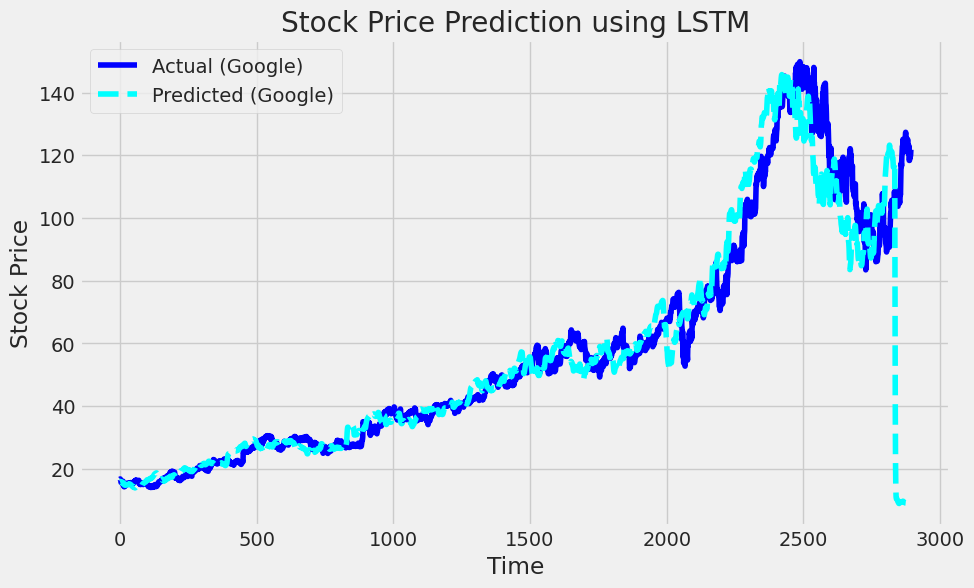

In [35]:
google_data_actual = stock_data[stock_data['company_name'] == 'GOOGL']['Close'].values[:train_size]
google_data_predicted = train_predictions.flatten()[:len(google_data_actual)]

plt.figure(figsize=(10, 6))
plt.plot(google_data_actual, color='blue', label='Actual (Google)')
plt.plot(google_data_predicted, color='cyan', linestyle='--', label='Predicted (Google)')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()



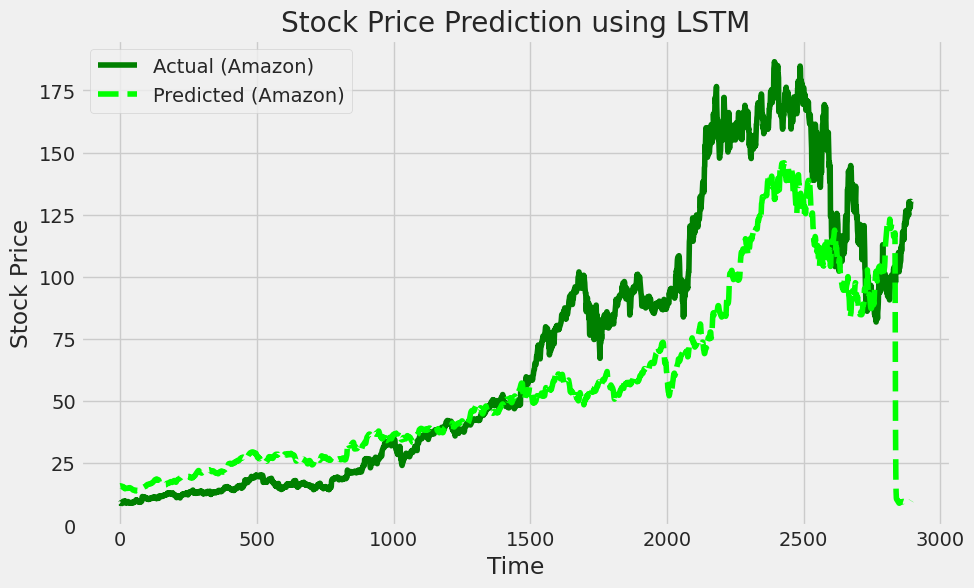

In [36]:
amazon_data_actual = stock_data[stock_data['company_name'] == 'AMZN']['Close'].values[:train_size]
amazon_data_predicted = train_predictions.flatten()[:len(amazon_data_actual)]
plt.figure(figsize=(10, 6))
plt.plot(amazon_data_actual, color='green', label='Actual (Amazon)')
plt.plot(amazon_data_predicted, color='lime', linestyle='--', label='Predicted (Amazon)')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

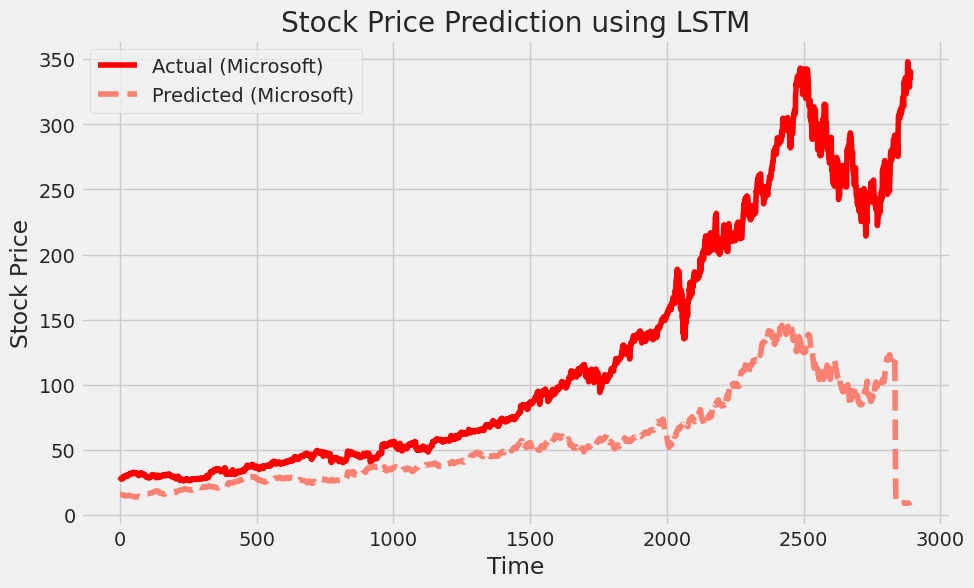

In [37]:
microsoft_data_actual = stock_data[stock_data['company_name'] == 'MSFT']['Close'].values[:train_size]
microsoft_data_predicted = train_predictions.flatten()[:len(microsoft_data_actual)]
plt.figure(figsize=(10, 6))
plt.plot(microsoft_data_actual, color='red', label='Actual (Microsoft)')
plt.plot(microsoft_data_predicted, color='salmon', linestyle='--', label='Predicted (Microsoft)')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

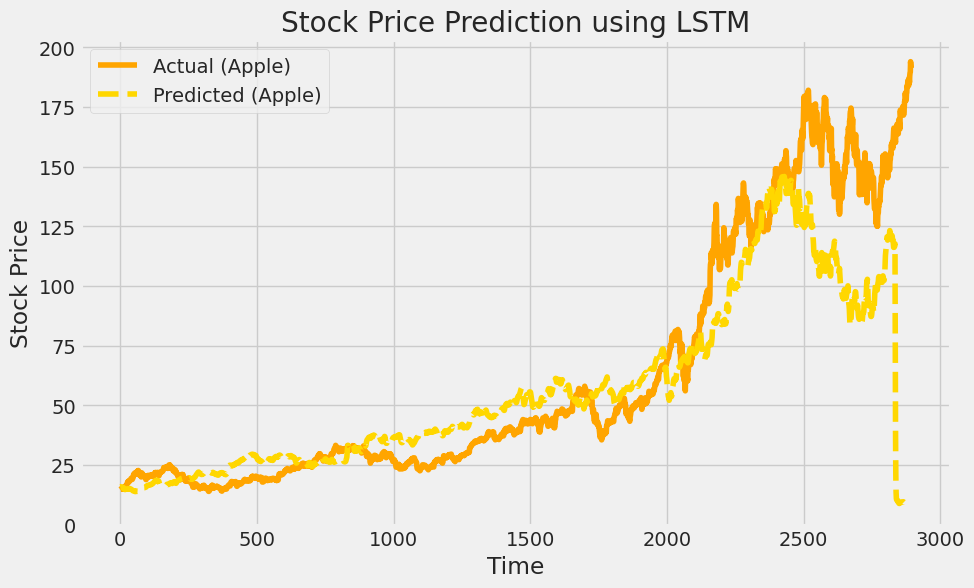

In [38]:

apple_data_actual = stock_data[stock_data['company_name'] == 'AAPL']['Close'].values[:train_size]
apple_data_predicted = train_predictions.flatten()[:len(apple_data_actual)]
plt.figure(figsize=(10, 6))
plt.plot(apple_data_actual, color='orange', label='Actual (Apple)')
plt.plot(apple_data_predicted, color='gold', linestyle='--', label='Predicted (Apple)')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

Model Performance

In [39]:
import numpy as np

# Adjust the lengths of actual and predicted arrays
actual_data = stock_data['Close'].values[train_size + time_steps: train_size + time_steps + len(test_predictions)]
predicted_data = test_predictions.flatten()[:len(actual_data)]

# Calculate the percentage change in stock prices for the actual and predicted values
actual_returns = np.diff(actual_data) / actual_data[:-1]
predicted_returns = np.diff(predicted_data) / actual_data[:-1]

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((predicted_data - actual_data) / actual_data))

# Calculate the direction accuracy
actual_direction = np.sign(actual_returns)
predicted_direction = np.sign(predicted_returns)
direction_accuracy = np.mean(actual_direction == predicted_direction) * 100

# Print the performance metrics
print("Model Performance:")
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape * 100))
print("Direction Accuracy: {:.2f}%".format(direction_accuracy))


Model Performance:
Mean Absolute Percentage Error (MAPE): 3.30%
Direction Accuracy: 49.45%
